In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
sia = SentimentIntensityAnalyzer()

In [3]:
train_df = pd.read_csv("train.csv", header=None, names=['Rating', 'Title', 'Review'], encoding='utf-8', nrows=100000)
test_df = pd.read_csv("test.csv", header=None, names=['Rating', 'Title', 'Review'], encoding='utf-8', nrows=100000)

In [4]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

def get_sentiment(text):
    text = clean_text(text)  # Preprocess text before analyzing sentiment
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [5]:
# Apply sentiment analysis on training dataset
train_df['Predicted_Sentiment'] = train_df['Review'].apply(get_sentiment)

# Apply sentiment analysis on testing dataset
test_df['Predicted_Sentiment'] = test_df['Review'].apply(get_sentiment)

In [6]:
# Convert numerical ratings to actual sentiment labels (assuming 1-2: Negative, 3: Neutral, 4-5: Positive)
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

In [7]:
# Apply the mapping to create true labels
test_df['Actual_Sentiment'] = test_df['Rating'].apply(map_rating_to_sentiment)

In [8]:
# Calculate accuracy
accuracy = accuracy_score(test_df['Actual_Sentiment'], test_df['Predicted_Sentiment'])
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Print classification report
print("Classification Report:\n")
print(classification_report(test_df['Actual_Sentiment'], test_df['Predicted_Sentiment']))

# Confusion Matrix
cm = confusion_matrix(test_df['Actual_Sentiment'], test_df['Predicted_Sentiment'])

Accuracy: 53.40%

Classification Report:

              precision    recall  f1-score   support

    Negative       0.68      0.43      0.52     39494
     Neutral       0.22      0.04      0.07     20192
    Positive       0.50      0.89      0.64     40314

    accuracy                           0.53    100000
   macro avg       0.47      0.45      0.41    100000
weighted avg       0.51      0.53      0.48    100000



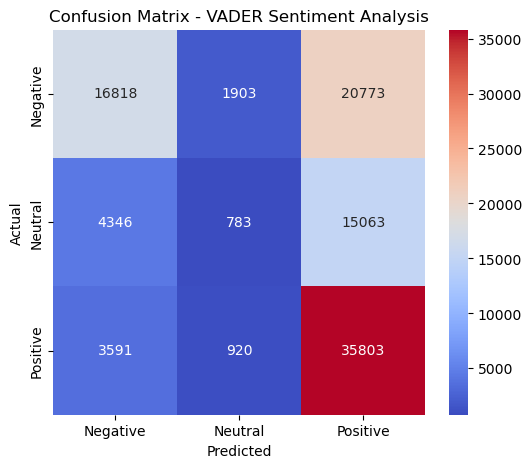

In [9]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - VADER Sentiment Analysis")
plt.show()

In [10]:
# Testing on new reviews
new_reviews = [
    "I love this product, it's awesome!",
    "It's the worst thing I have ever bought.",
    "Just okay, not too impressed.",
    "Absolutely fantastic experience!",
    "I would never buy this again, total waste of money!"
]

# Perform sentiment analysis on new reviews
for review in new_reviews:
    sentiment = get_sentiment(review)
    print(f"Review: \"{review}\" → Sentiment: {sentiment}")

Review: "I love this product, it's awesome!" → Sentiment: Positive
Review: "It's the worst thing I have ever bought." → Sentiment: Negative
Review: "Just okay, not too impressed." → Sentiment: Negative
Review: "Absolutely fantastic experience!" → Sentiment: Positive
Review: "I would never buy this again, total waste of money!" → Sentiment: Negative
